In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6)


In [5]:
#  3. Convert the June temperatures to a list.

results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns=['date','temperature'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


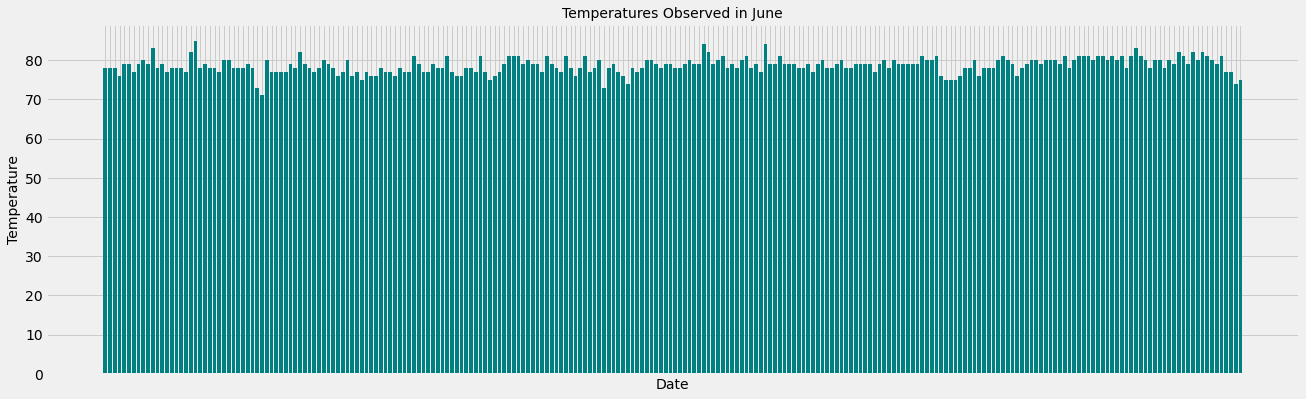

In [8]:
plt.figure(figsize=(20,6))
plt.bar(df['date'], df['temperature'], color='teal')
plt.title('Temperatures Observed in June', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.xticks(visible = False)
plt.show()

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12)

In [10]:
# 7. Convert the December temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df2 = pd.DataFrame(results, columns=['date','temperature'])

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df2.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


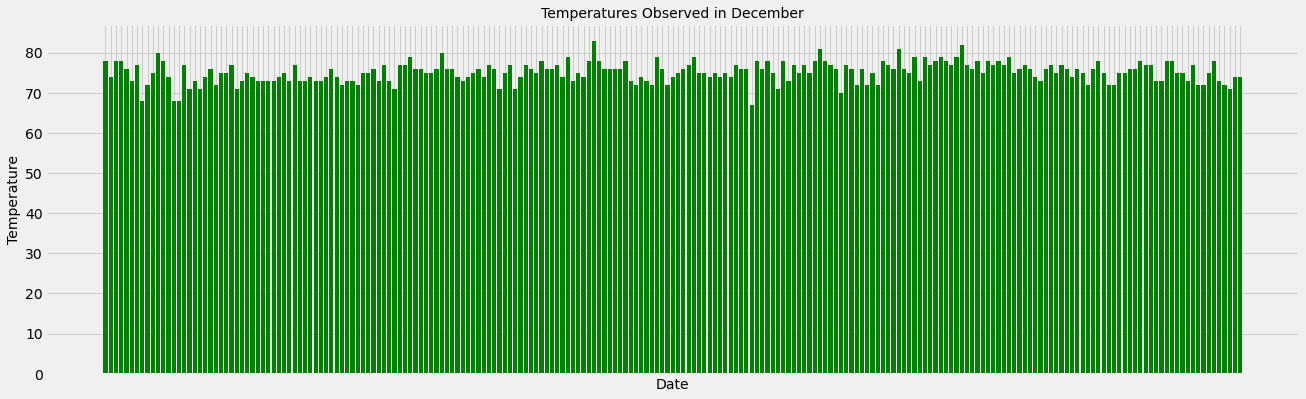

In [13]:
plt.figure(figsize=(20,6))
plt.bar(df2['date'], df2['temperature'], color='green')
plt.title('Temperatures Observed in December', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
#plt.xticks(rotation=90)
plt.xticks(visible = False)
plt.show()


D3: Summary - Additional Weather Queries and Histograms for June and December


In [14]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

<AxesSubplot:ylabel='Frequency'>

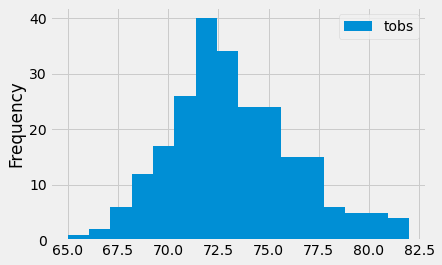

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the temperature observation data for this station for June and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(extract('month', Measurement.date)==6).all()
df3 = pd.DataFrame(results, columns=['tobs'])
#print(df3)
df3.plot.hist(bins=16)


<AxesSubplot:ylabel='Frequency'>

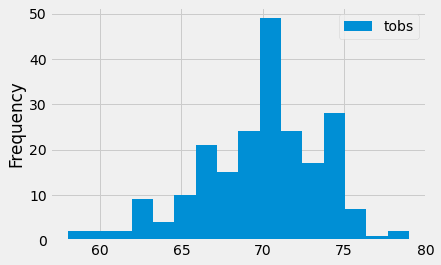

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the temperature observation data for this station for December and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(extract('month', Measurement.date)==12).all()
df4 = pd.DataFrame(results, columns=['tobs'])
#print(df4)
df4.plot.hist(bins=16)